### Загрузка данных по титанику.

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [79]:
titanic = pd.read_csv('titanic.csv')
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Данные, которые мы имеем, содержат следующие столбцы:

Unnamed: 0 - Похоже, это индекс строки.

survived - Указывает, выжил человек или нет (1 - выжил, 0 - нет).

pclass - Класс билета (1-й, 2-й, 3-й класс).

sex - Пол пассажира.

age - Возраст пассажира.

sibsp - Количество братьев и сестер/супругов на борту.

parch - Количество родителей/детей на борту.

fare - Стоимость билета.

embarked - Порт посадки (C - Cherbourg, Q - Queenstown, S - Southampton).

class - Класс билета (дублирует pclass).

who - Половая категория (man, woman, child).

adult_male - Был ли пассажир взрослым мужчиной.

deck - Палуба, на которой находилась каюта.

embark_town - Название города посадки.

alive - Выжил ли пассажир (дублирует survived).

alone - Был ли пассажир один.

In [74]:
titanic.describe() # статистические параметры наших данных.

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Общее кол-во данных: 891

Есть пропущенные данные в столбцах:  age embarked embark_town deck

### Исследование данных титаника

Проведем несколько исследований по данным титаника:

 1) Исследуем, насколько класс билета (1-й, 2-й, 3-й) влиял на шансы выживания.

 2) Изучим, как количество родственников (братья/сестры, супруги, родители/дети) влияло на шансы выживания.

 3) Исследуем, как пол и возраст влияли на шансы выживания.

#### 1

Для начала проанализируем, как класс билета (1-й, 2-й, 3-й) влиял на шансы выживания.

C:\Users\User\AppData\Local\Temp\ipykernel_11056\2344922920.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic, ci=None, palette='muted')


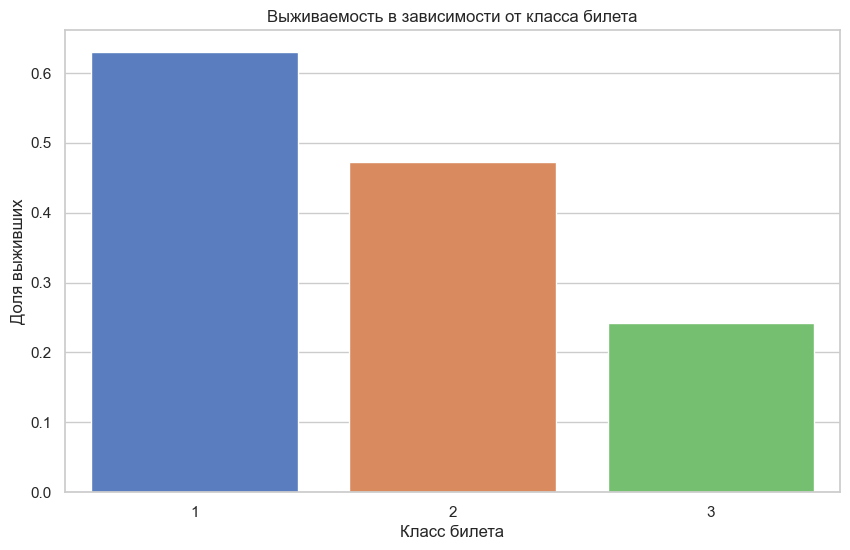

In [83]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=titanic, ci=None, palette='muted')
plt.title('Выживаемость в зависимости от класса билета')
plt.xlabel('Класс билета')
plt.ylabel('Доля выживших')
plt.show()

pie.chart()

На графике видно, что вероятность выживания значительно варьируется в зависимости от класса билета. Пассажиры 1-го класса имели наибольшие шансы на выживание, за ними следуют пассажиры 2-го класса, и наименьшие шансы были у пассажиров 3-го класса. Это говорит о том, что социальный статус и условия, в которых находились пассажиры, могли оказывать существенное влияние на их шансы выжить.

Помимо визуальной составляющей давайте проверим нашу гипотезу статистически. Для этого сформируем 2 гипотезы.

H0 (Нулевая гипотеза): Класс билета не влияет на выживание пассажира.

H1 (Альтернативная гипотеза): Класс билета влияет на выживание пассажира.

Для проверки гипотезы можно использовать хи-квадрат тест независимости. Этот тест позволяет оценить, есть ли статистически значимая связь между двумя категориальными переменными.

In [93]:
sur = titanic[['pclass','survived']]
sur

,pclass,survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [96]:
# Создание таблицы сопряженности
contingency_table = pd.crosstab(sur['pclass'], sur['survived'])

# Выполнение хи-квадрат теста
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

alpha = 0.05
if p < alpha:
    print("Отвергаем H0: Класс билета влияет на выживание.")
else:
    print("Не отвергаем H0: Класс билета не влияет на выживание.")

Chi-squared: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of freedom: 2
Expected frequencies:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
Отвергаем H0: Класс билета влияет на выживание.


#### 2

C:\Users\User\AppData\Local\Temp\ipykernel_11056\3161667959.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_size', y='survived', data=titanic, ci=None, palette='muted')


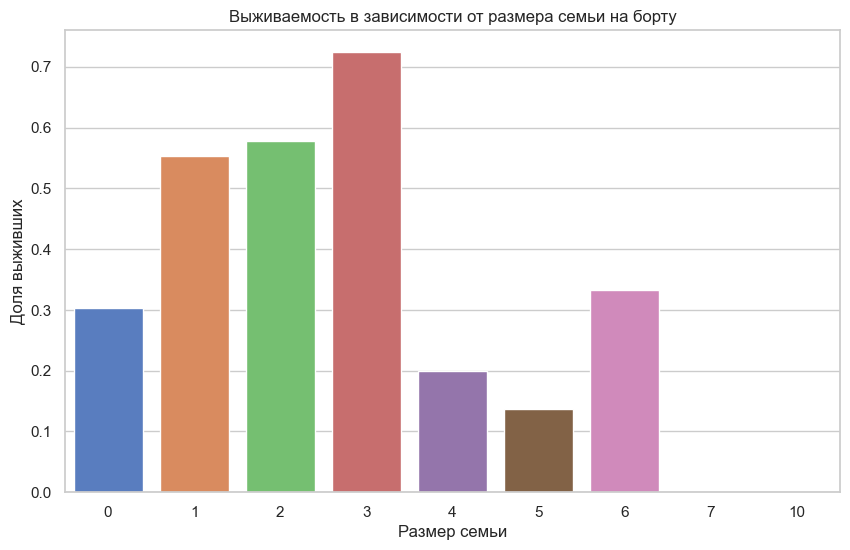

In [100]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

# Анализ выживаемости в зависимости от размера семьи
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=titanic, ci=None, palette='muted')
plt.title('Выживаемость в зависимости от размера семьи на борту')
plt.xlabel('Размер семьи')
plt.ylabel('Доля выживших')
plt.show()

График показывает, что пассажиры с небольшими семьями (1-3 человека) имели наибольшие шансы на выживание. Пассажиры, путешествовавшие в одиночку или с очень большой семьёй, имели значительно меньшие шансы выжить.

#### 3

In [110]:
survival_by_sex = titanic.groupby('sex')['survived'].mean()
survival_by_sex = pd.DataFrame(survival_by_sex)
survival_by_sex = survival_by_sex.reset_index()
survival_by_sex

,sex,survived
0,female,0.742038
1,male,0.188908


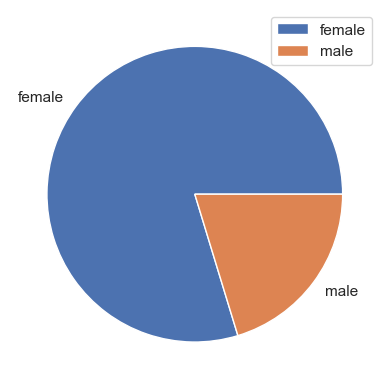

In [112]:
plt.pie(survival_by_sex['survived'],labels = survival_by_sex['sex'])
plt.legend()
plt.show()

Круговая диаграмма показывает долю выживших для мужчин и женщин.

C:\Users\User\AppData\Local\Temp\ipykernel_11056\3678167464.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['survived'] == 1]['age'], shade=True, label='Выжившие', color='blue')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_11056\3678167464.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['survived'] == 0]['age'], shade=True, label='Погибшие', color='red')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_a

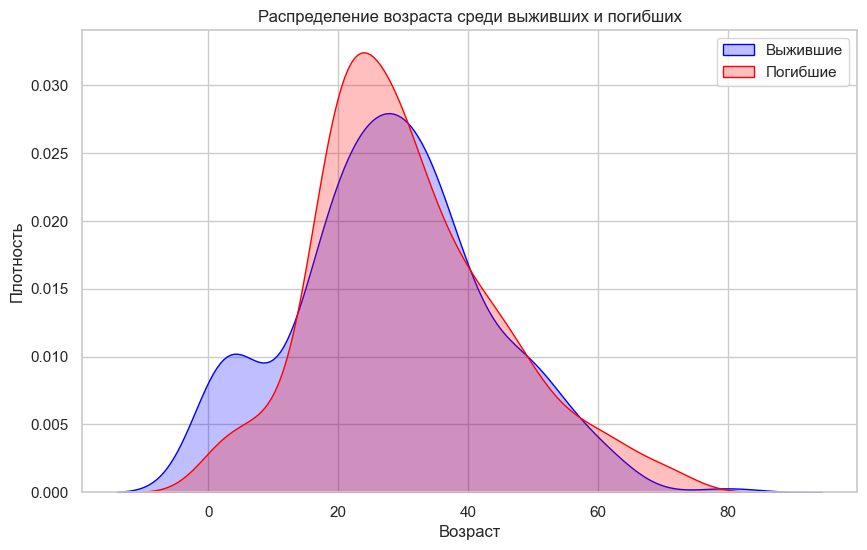

In [115]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic[titanic['survived'] == 1]['age'], shade=True, label='Выжившие', color='blue')
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], shade=True, label='Погибшие', color='red')
plt.title('Распределение возраста среди выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Этот график показывает, как возраст распределяется среди выживших и погибших пассажиров.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


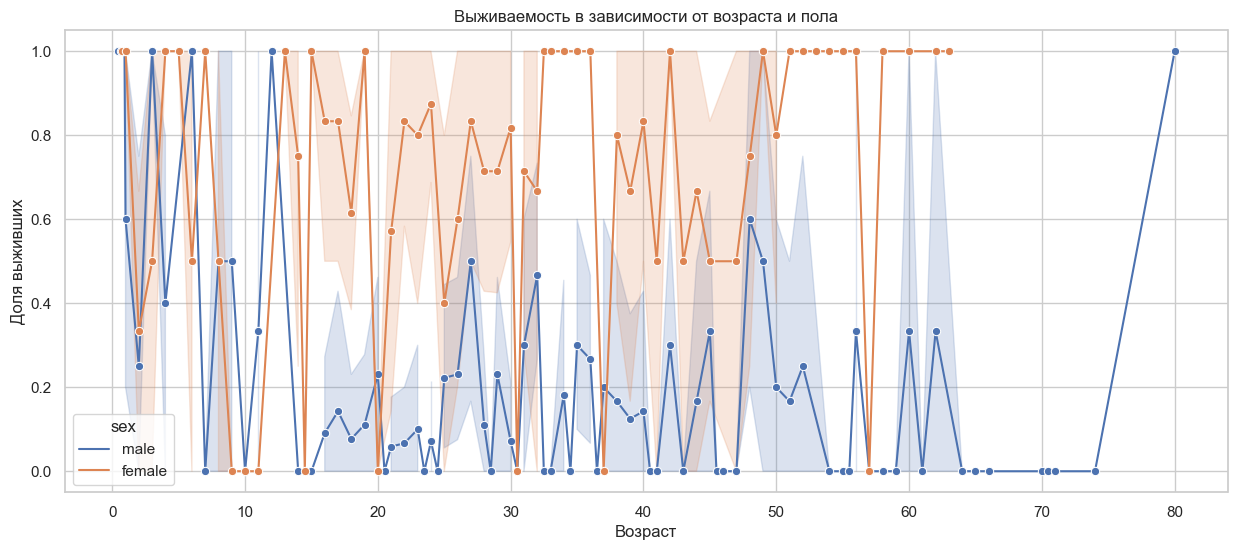

In [118]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='age', y='survived', hue='sex', data=titanic, marker='o')
plt.title('Выживаемость в зависимости от возраста и пола')
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.show()

Этот график покажет, как возраст и пол вместе влияют на шансы выживания.